# Random Forest Regression
Note: We will be using the same template and data from the decision tree regression notebook since decision tree and random forest are closely related and go hand to hand. Depending on the problem, you could start with a decision tree and then move onto random forest to improve predictability and accuracy. 

### What is random forest regression

- Random Forest, an ensemble learing type, is one of the most popular and most powerful machine learning algorithm for predictive analytics. It develops lots of decision tree based on random selection of data and random selection of variables. It then votes on which branch best predicts the desired output and thus 
## FINISH HERE
    * Ensemble learning - is when you take multiple machine learning algorithms to create one big one, they can be of the same type or different ML algorithms
    * Bagging (also called Bootstrap aggregating) is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.
- Random Forest is a supervised learning algorithm and as the name suggests, this algorithm creates the forest with a number of trees. In general, the more trees in the forest the more robust the forest looks like. In the same way in the random forest classifier, the higher the number of trees in the forest, the higher accuracy results it gives.
- Random forests combine the predictions of multiple decision trees, and so it is considered a type of additive model. Recall from our previous tutorial in constructing a decision tree, the dataset is repeatedly divided into subtrees, guided by the best combination of variables. However, finding the right combination of variables can be difficult. For instance, a decision tree constructed based on a small sample might not be generalizable to future, large samples. To overcome this, multiple decision trees could be constructed, by randomizing the combination and order of variables used. The aggregated result from these forest of trees would form an ensemble, known as a random forest.

<b>Steps to followfor Random Forest Regression</b>

Step 1: Pick at random K data points from the Training Set.<br>
Step 2: Build the Decision Tree associated with the K data points.<br>
Step 3: Choose the number Ntree of trees you want to build and repeat Steps 1 and 2.<br>
Step 4: For a new data point, make each one of your Ntree trees predict the value of Y to the data point in question, and assign the new data point the average across all of the predicted y values.

<b>Advantages of using Random Forest technique:</b>

- Is robust to overfitting (thus solving one of the biggest disadvantages of decision trees).
- Parameterization remains quite simple and intuitive.
- Performs very well when the number of features is big and for large quantity of learning data.
- Handles missing values and maintains accuracy for missing data.


<b>Disadvantage of using Random Forest technique:</b>

- Regression Trees are known to be very unstable, a small change in your data may drastically change your model.
- Models generated with Random Forest may take a lot of memory.
- Learning may be slow (depending on the parameterization).
- Not possible to iteratively improve the generated models.



Link to a real world use for random forest by Microsoft
https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/BodyPartRecognition.pdf

<b>Problem: </b> improve from the previous decision tree model, the accuracy and predictability, of the position level to the expected salary of a potential new employee.

### Import Python Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import the Dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset # prints the dataset in a nice table format

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Split the dataset into the independent variable X, and dependent variable y.

In [3]:
# We make use of pandas dataframe iloc feature, its a purely integer-location based indexing for selection by position.
# Format: pandas.DtaFrame.values
X = dataset.iloc[:, 1:2].values # as parameters it takes an array of integeres to split the data into its respective variables.
y = dataset.iloc[:, 2].values # .values means get values from the dataset

In [4]:
print(X) # print the variables of X

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y) # print the values of y

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Fitting Random  Forest Regression to the Dataset

<b>RandomForestRegressor:</b> A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [1]:
# import RandomForestRegressor from the ensemble method of sklearn
from sklearn.ensemble import RandomForestRegressor

# number of trees in the forest (n_estimator) is set to 300, this value will affect the plot graph and the y prediction salary. 
# Play around with the value to see the changes more or less trees have on our model.
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0) 

# fit() method used to fit the random forest model into our dataset for the X matrix of features, and the y dependent variable.
regressor.fit(X, y)

NameError: name 'X' is not defined

### Prediciting a new result

In [7]:
# The predict() method, given the unlabeled observation of X, returns the predicted values of y
y_pred = regressor.predict(6.5)
print(y_pred) # the output will vary depending on the number of forest trees (n_estimator)

[ 160333.33333333]


### Visualizing the Regression Results

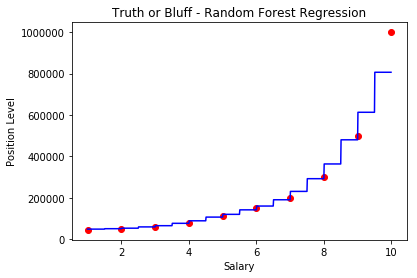

In [8]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff - Random Forest Regression')
plt.ylabel('Position Level')
plt.xlabel('Salary')
plt.show()